<a href="https://colab.research.google.com/github/imPhacko/PublicProjects/blob/main/LogisticRegression_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

## Definition

Models the probability of a sample belonging to category $y$ given the dependent variables $X=(1, x_1, x_2,... x_k)$

We're working with categorical variables now, so we need a way to transform the line function we had for linear regression into a probabilistic estimate. The logistic (or more specifically - sigmoid) function can do that!

$\sigma(z)=\dfrac{1}{1 + e^{-z}}$

The probability of a sample $X$ belonging to a category can now be obtained:

$\hat{y} = \sigma(\theta^T X)$,

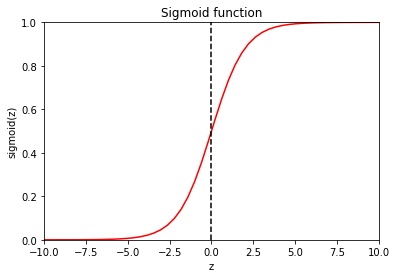

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

z = np.linspace(-20, 20, num=100)

plt.plot(z, sigmoid(z), color="red")
plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.xlim([-10, 10])
plt.ylim([0, 1])

plt.axvline(0, ls="--", color="black")


# Optimizing

## Cross-entropy loss

Used to characterise the differences between two probability distributions.

Assume we have $n$ observations as vectors $X_1, X_2,... X_n$ and their corresponding outcomes $y_1, y_2, ..., y_n$.

Our loss over the training set is the sum of the losses for each individual sample:

$\mathcal{L}=\dfrac{1}{n}\sum\limits_{i=1}^n H(\hat{y}_i, y_i)$

If $y_i$ can be either 0 or 1 we can divide cross-entropy into two parts:

$H(\hat{y}_i, y_i)=\begin{cases}
   -\log(\hat{y}_i) & \text{if } y_i = 1 \\
   -\log(1-\hat{y}_i)       & \text{if } y_i = 0
  \end{cases}$

Or:

$H(\hat{y}_i, y_i)=-y_i \log(\hat{y}_i)-(1-y_i) \log(1-\hat{y}_i)$

Let's quickly illustrate that minimizing such a loss function would produce a good classifier. That is: the bigger the mistake our model made, the higher our loss, and vice versa.

In [ ]:
import numpy as np

def cross_entropy(y_predicted, y_true):
  return -y_true * np.log(y_predicted) - (1 - y_true) * np.log(1 - y_predicted)

# What if our sample belongs to the 1st category and we're predicting that it does with a high probability (0.8)
y_true = 1
y_predicted = 0.8

ce = cross_entropy(y_predicted, y_true)
print(f"cross entropy of {y_true} vs {y_predicted:.1f} = {ce:.4f}")

# What if our sample belongs to the 1st category, but we're predicting that it does with a low probability (0.2)
y_true = 1
y_predicted = 0.2

ce = cross_entropy(y_predicted, y_true)
print(f"cross entropy of {y_true} vs {y_predicted:.1f} = {ce:.4f}")

# What if our sample doesn't belong to the 1st category and we're predicting that it does with a low probability (0.2)
y_true = 0
y_predicted = 0.2

ce = cross_entropy(y_predicted, y_true)
print(f"cross entropy of {y_true} vs {y_predicted:.1f} = {ce:.4f}")

# What if our sample doesn't belong to the 1st category and we're predicting that it does with a low probability (0.2)
y_true = 0
y_predicted = 0.8

ce = cross_entropy(y_predicted, y_true)
print(f"cross entropy of {y_true} vs {y_predicted:.1f} = {ce:.4f}")

cross entropy of 1 vs 0.8 = 0.2231
cross entropy of 1 vs 0.2 = 1.6094
cross entropy of 0 vs 0.2 = 0.2231
cross entropy of 0 vs 0.8 = 1.6094


## Optimizing

We should be able to minimize $\mathcal{L}$ by setting the loss function's derivative w.r.t $\theta$ to 0 as before:

$\dfrac{\partial }{\partial \theta_j} \mathcal{L}(\theta)=0$

But this time we're in trouble, there is no closed-form solution!


# Gradient descent

Things aren't too bad, we **can** calculate the gradient at least, as cross-entropy is differentiable! Iterative optimization is an option. We can take small steps down the slope of our loss function, which should lead us towards the minimum. Repeat this parameter update a whole bunch of times and you're bound to get somewhere:

$\theta_j \leftarrow \theta_j - \alpha \dfrac{\partial }{\partial \theta_j} \mathcal{L}(\theta)$

You only need the ability to calculate the gradient of your loss function w.r.t your parameters and this method (usually) works!

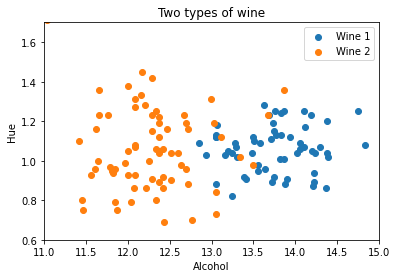

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("/content/drive/My Drive/datasets/wine.csv")

wine1 = data[data["Wine"] == 1]
wine2 = data[data["Wine"] == 2]

plt.scatter(wine1["Alcohol"], wine1["Hue"], label="Wine 1")
plt.scatter(wine2["Alcohol"], wine2["Hue"], label="Wine 2")
plt.title("Two types of wine")
plt.xlim([11, 15])
plt.ylim([0.6, 1.7])
plt.xlabel("Alcohol")
plt.ylabel("Hue")
plt.legend()

In [ ]:
# Let's convert these tables to something that could be fed to our model
# What we're looking for is an array with our dependent variables (bias, Alcohol and Hue)
# And an array with our expected predictions (either 0 or 1) indicating which category out
# of the 2 the wine belongs to

total_samples = len(wine1) + len(wine2)
X_train = np.ones((total_samples, 2), dtype=np.float32) # First column for Alcohol and second for Hue
X_train[:len(wine1)] = wine1[["Alcohol", "Hue"]].to_numpy()
X_train[len(wine1):] = wine2[["Alcohol", "Hue"]].to_numpy()

y_train = np.zeros((total_samples, 1), dtype=np.float32) # Just one column which will be either 0 or 1
y_train[len(wine1):] = 1

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (130, 2), y_train shape: (130, 1)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tqdm import tqdm

In [ ]:
@tf.function
def loss(y_true, y_pred):
    cross_entropy = -y_true*tf.math.log(y_pred) - (1 - y_true)*tf.math.log(1 - y_pred)
    return tf.reduce_mean(cross_entropy)

class LogisticModel:
    def __init__(self):
        self.W = tf.Variable(tf.zeros([2, 1]))
        self.b = tf.Variable(tf.zeros([1]))

        self.trainable_variables = [self.W, self.b]

    @tf.function
    def forward(self, X):
        line_prediction = tf.matmul(X, self.W) + self.b
        prob_prediction = tf.nn.sigmoid(line_prediction)
        return prob_prediction

    @tf.function
    def backward(self, X, y):
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.05)
        with tf.GradientTape() as tape:
            y_pred = self.forward(X)
            current_loss = loss(y, y_pred)
        gradients = tape.gradient(current_loss, self.trainable_variables)
        optimizer.apply_gradients(zip(gradients, self.trainable_variables))

In [ ]:
model = LogisticModel()

for i in range(5000):
    model.backward(X_train, y_train)

prob_predictions = model.forward(X_train)

category_prediction = tf.math.round(prob_predictions)
category_prediction = tf.cast(category_prediction, tf.int32)
y_category = tf.cast(y_train, tf.int32)
correct_prediction = tf.equal(category_prediction, y_category)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy)

tf.Tensor(0.9076923, shape=(), dtype=float32)


In [ ]:
# Create a dense probability map of the Alcohol-Hue space
xx, yy = np.mgrid[10:16:0.01, 0:2:0.01]
grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)

probs = model.forward(grid).numpy().T.reshape(xx.shape)

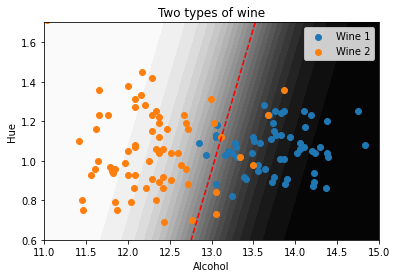

In [ ]:
contour = plt.contourf(xx, yy, probs, 25, cmap="gray", vmin=0, vmax=1)

x_vals = [-100, 100]
y_vals = -(x_vals * model.W[0] + model.b[0])/model.W[1]

plt.plot(x_vals, y_vals, '--', c="red")
plt.scatter(wine1["Alcohol"], wine1["Hue"], label="Wine 1")
plt.scatter(wine2["Alcohol"], wine2["Hue"], label="Wine 2")
plt.title("Two types of wine")
plt.xlim([11, 15])
plt.ylim([0.6, 1.7])
plt.xlabel("Alcohol")
plt.ylabel("Hue")
plt.legend()